<a href="https://colab.research.google.com/github/aismaanly/bikesharing_analysis/blob/main/notebook_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis Project : Bike Sharing Dataset ✨**

* Name : Aisma Nurlaili
* Email : aismanurlaili@gmail.com

## **Defining Business Questions**

1. What is the daily distribution of bike-sharing users based on user type?
2. How productive is Bike Sharing within a 24-hour period?
3. How productive is Bike Sharing on a monthly basis?
4. How do weather conditions and seasons influence the productivity of Bike Sharing?
5. When was the last time the customer made a transaction?
6. How often has the customer made purchases in the past few months?
7. How much money has the customer spent in the past few months?

## **Prepare the required libraries**

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Data Wrangling**

### 1.1 Gathering Data

In [ ]:
# Directory containing the CSV files
data_dir = "drive/MyDrive/dataset/bike/"

# Reading CSV files
day = pd.read_csv(data_dir + 'day.csv')
hour = pd.read_csv(data_dir + 'hour.csv')

data = {'day': day,
        'hour': hour}

In [ ]:
data['day'].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data['hour'].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 1.2 Assessing Data

#### 1.2.1 Check for All of The Data Types

In [ ]:
for df_name, df in data.items():
  print(df_name, '\n', data[df_name].info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
day 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data

#### 1.2.2 Check for Duplicates

In [ ]:
# Initialize a dictionary to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
day,731,0
hour,17379,0


#### 1.2.3 Check for Missing Values

In [ ]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

day 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

hour 
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



#### 1.2.4 Check for Parameter Statistic

In [ ]:
data['day'].describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
data['hour'].describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### 1.3 Cleaning Data
- Convert the data type of the **dteday** column from object to datetime.  
- Remove the **holiday** column, as it is already represented by the **workingday** column.  
- Rename columns to make them more readable.  
- Convert the contents of some columns to make them easier to understand.  

#### 1.3.1 Day



* Change the data type of the dteday column from object to datetime

In [ ]:
datetime_columns = ['dteday']

for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

* Drop the holiday column, as its information is already included in the workingday column

In [ ]:
day.drop(['holiday'], axis =1, inplace= True)

* Rename certain column headers to improve clarity and minimize writing errors

In [ ]:
day.rename(columns={'dteday':'date',
                    'yr':'year',
                    'mnth':'month',
                    'weekday':'day',
                    'workingday':'category_day',
                    'weathersit':'weather',
                    'temp':'temperature',
                    'atemp':'temperature_feel',
                    'hum':'humidity',
                    'casual':'casual_user',
                    'registered':'registered_user',
                    'cnt':'total_user'}, inplace=True)

print('Day cols: ' , data['day'].columns.values)

Day cols:  ['instant' 'date' 'season' 'year' 'month' 'day' 'category_day' 'weather'
 'temperature' 'temperature_feel' 'humidity' 'windspeed' 'casual_user'
 'registered_user' 'total_user']


Convert numerical season codes to their respective names. The mapping is as follows:
- 1 represents spring
- 2 represents summer
- 3 represents fall
- 4 represents winter

In [ ]:
def change_season(x):
    if x == 1:
        return 'springer'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

day['season'] = day['season'].apply(change_season)
day.head()

,instant,date,season,year,month,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Update the year based on the following conditions:
- 0 corresponds to 2011
- 1 corresponds to 2012

In [ ]:
def change_year(x):
    if x == 0:
        return '2011'
    else:
        return '2012'

day['year'] = day['year'].apply(change_year)
day.head()

,instant,date,season,year,month,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Arrange the month data sequentially in chronological order

In [ ]:
change_month = {1: 'january',
                2: 'february',
                3: 'march',
                4:'april',
                5:'may',
                6:'june',
                7:'july',
                8:'august',
                9:'september',
                10:'october',
                11:'november',
                12:'december'}

day['month'] = day['month'].map(change_month)
day.head()

,instant,date,season,year,month,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Convert weekday data into the corresponding day names

In [ ]:
change_day = {0:'sunday',
              1:'monday',
              2:'tuesday',
              3:'wednesday',
              4:'thursday',
              5:'friday',
              6:'saturday'}

day['day'] = day['day'].map(change_day)
day.head()

,instant,date,season,year,month,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Convert numeric data for category_day into descriptive labels to provide clearer meaning

In [ ]:
def change_category_day(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'weekday'

day['category_day'] = day['category_day'].apply(change_category_day)
day.head()

,instant,date,season,year,month,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,saturday,weekend/holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,sunday,weekend/holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,monday,weekday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,tuesday,weekday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,wednesday,weekday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Change the weather data to reflect more accurate descriptions based on the following conditions:

- 1 represents clear weather  
- 2 represents mist  
- 3 represents light snow  
- 4 represents heavy rain  

In [ ]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

day['weather'] = day['weather'].apply(change_weather)
day.head()

,instant,date,season,year,month,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,saturday,weekend/holiday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,sunday,weekend/holiday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,monday,weekday,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,tuesday,weekday,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,wednesday,weekday,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 1.3.2 Hour

In [ ]:
datetime_columns = ['dteday']

for column in datetime_columns:
  hour[column] = pd.to_datetime(hour[column])

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
hour.drop(['holiday'], axis =1, inplace= True)

In [ ]:
hour.rename(columns={'dteday':'date',
                    'yr':'year',
                    'mnth':'month',
                    'hr':'hour',
                    'weekday':'day',
                    'workingday':'category_day',
                    'weathersit':'weather',
                    'temp':'temperature',
                    'atemp':'temperature_feel',
                    'hum':'humidity',
                    'casual':'casual_user',
                    'registered':'registered_user',
                    'cnt':'total_user'}, inplace=True)

print('Hour cols: ' , data['hour'].columns.values)

Hour cols:  ['instant' 'date' 'season' 'year' 'month' 'hour' 'day' 'category_day'
 'weather' 'temperature' 'temperature_feel' 'humidity' 'windspeed'
 'casual_user' 'registered_user' 'total_user']


In [ ]:
def change_season(x):
    if x == 1:
        return 'springer'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

hour['season'] = hour['season'].apply(change_season)
hour.sample(10)

,instant,date,season,year,month,hour,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
1917,1918,2011-03-25,summer,0,3,16,5,1,2,0.34,0.3030,0.34,0.2985,23,127,150
14891,14892,2012-09-17,fall,1,9,16,1,1,2,0.64,0.6061,0.69,0.2537,74,379,453
3497,3498,2011-05-30,summer,0,5,15,1,0,1,0.88,0.8030,0.39,0.2537,132,179,311
14354,14355,2012-08-26,fall,1,8,7,0,0,1,0.64,0.5758,0.89,0.1940,11,23,34
9818,9819,2012-02-19,springer,1,2,1,0,0,2,0.32,0.3030,0.39,0.2537,10,62,72
14548,14549,2012-09-03,fall,1,9,9,1,0,2,0.70,0.6667,0.84,0.1343,71,158,229
9400,9401,2012-02-01,springer,1,2,14,3,1,1,0.62,0.6212,0.33,0.2239,33,159,192
12786,12787,2012-06-21,fall,1,6,23,4,1,1,0.80,0.7727,0.59,0.0896,12,134,146
11384,11385,2012-04-24,summer,1,4,13,2,1,1,0.50,0.4848,0.29,0.3881,35,189,224
3089,3090,2011-05-13,summer,0,5,15,5,1,2,0.52,0.5000,0.88,0.1642,56,142,198


In [ ]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

hour['year'] = hour['year'].apply(change_year)
hour.head()

,instant,date,season,year,month,hour,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
change_month = {1: 'january',
                2: 'february',
                3: 'march',
                4:'april',
                5:'may',
                6:'june',
                7:'july',
                8:'august',
                9:'september',
                10:'october',
                11:'november',
                12:'december'}

hour['month'] = hour['month'].map(change_month)
hour.head()

,instant,date,season,year,month,hour,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
change_day = {0: 'monday',
              1: 'tuesday',
              2: 'wednesday',
              3: 'thursday',
              4:'friday',
              5:'saturday',
              6:'sunday'}

hour['day'] = hour['day'].map(change_day)
hour.head()

,instant,date,season,year,month,hour,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
def change_category_day(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'weekday'

hour['category_day'] = hour['category_day'].apply(change_category_day)
hour.head()

,instant,date,season,year,month,hour,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,weekend/holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

hour['weather'] = hour['weather'].apply(change_weather)
hour.head()

,instant,date,season,year,month,hour,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,0,sunday,weekend/holiday,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,january,1,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,january,2,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,january,3,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,january,4,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,0,1,1


## **2. Exploratory Data Analysis (EDA)**

### 2.1 Day Dataframe


In [ ]:
day.describe(include="all")

,instant,date,season,year,month,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012,january,saturday,weekday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day.groupby(by="season").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user                     \
         nunique         sum             sum        max   min         mean   
season                                                                       
fall         188      226091          835038       8714  1115  5644.303191   
springer     181       60622          410726       7836   431  2604.132597   
summer       184      203522          715067       8362   795  4992.331522   
winter       178      129782          711831       8555    22  4728.162921   

                   
              sum  
season             
fall      1061129  
springer   471348  
summer     918589  
winter     841613

Based on the data above, it is evident that Bike Sharing is used more often during the **Fall and Summer**

In [ ]:
day.groupby(by="day").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user                     \
          nunique         sum             sum        max   min         mean   
day                                                                           
friday        104       78238          409552       8362  1167  4690.288462   
monday        105       70784          384719       7525    22  4338.123810   
saturday      105      153852          323955       8714   627  4550.542857   
sunday        105      140521          303506       8227   605  4228.828571   
thursday      104       61460          423935       7804   431  4667.259615   
tuesday       104       57843          411266       7767   683  4510.663462   
wednesday     104       57319          415729       8173   441  4548.538462   

                   
              sum  
day                
friday     487790  
monday     455503  
saturday   477807  
sunday     444027  
thursday   485395  
tuesday    469109  
wednesday  473048

Considering the days of the week, **Saturday** has the highest number of Bike Sharing users, with an average of **4,690,288 users**

In [ ]:
day.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user        \
               nunique         sum             sum        max   min   
year month                                                            
2011 april          30       22346           72524       5312   795   
     august         31       28842          107849       5895  1115   
     december       31        8448           78875       3940   705   
     february       28        6242           41973       2927  1005   
     january        31        3073           35116       1985   431   
     july           31       36452          104889       6043  3285   
     june           30       30612          112900       5515  3767   
     march          31       12826           51219       3239   605   
     may            31       31050          104771       5805  2633   
     november       30       15594           86573       4486  1495   
     october        31       25222           98289       5511   627   
     september      30       26545          100873       5423  1842   
2012 april          30       38456          135768       7460  1027   
     august         31       43197          171306       7865  4549   
     december       31       13245          110468       6606   441   
     february       29        8721           94416       5062  1529   
     january        31        8969           87775       4521  1301   
     july           31       41705          161902       8173  4459   
     june           30       43294          159536       8120  4127   
     march          31       31618          133257       8362  3194   
     may            31       44235          151630       8294  2843   
     november       30       21009          131655       6852  2277   
     october        31       34538          164303       8156    22   
     september      30       43778          174795       8714  4073   

                                     
                       mean     sum  
year month                           
2011 april      3162.333333   94870  
     august     4409.387097  136691  
     december   2816.870968   87323  
     february   1721.964286   48215  
     january    1231.903226   38189  
     july       4559.387097  141341  
     june       4783.733333  143512  
     march      2065.967742   64045  
     may        4381.322581  135821  
     november   3405.566667  102167  
     october    3984.225806  123511  
     september  4247.266667  127418  
2012 april      5807.466667  174224  
     august     6919.451613  214503  
     december   3990.741935  123713  
     february   3556.448276  103137  
     january    3120.774194   96744  
     july       6567.967742  203607  
     june       6761.000000  202830  
     march      5318.548387  164875  
     may        6318.225806  195865  
     november   5088.800000  152664  
     october    6414.225806  198841  
     september  7285.766667  218573


In 2011, **June** recorded the highest number of Bike Sharing totaling **143,512 users**. Meanwhile, in 2012, the peak occurred in **September** with **218,573 users**

### 2.2 Hour Dataframe


In [ ]:
hour.describe(include="all")

,instant,date,season,year,month,hour,day,category_day,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,may,NaN,sunday,weekday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour.groupby(by=["category_day", "hour"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                     nunique         sum             sum        max min   
category_day    hour                                                      
weekday         0        496        3546           14700        283   2   
                1        494        1833            6344        114   1   
                2        487        1041            3188         74   1   
                3        470         428            1895         36   1   
                4        470         360            2192         17   1   
                5        495         629           11703         66   1   
                6        496        2142           48698        213   7   
                7        496        6049          138095        596  18   
                8        496       11043          225552        839  31   
                9        496       12059          107734        426  23   
                10       496       15478           51664        275   8   
                11       496       18649           59833        361  10   
                12       497       20555           79253        471   3   
                13       498       21199           77619        428  11   
                14       498       22843           68576        651  12   
                15       498       23074           77189        601  13   
                16       499       24124          122144        634  13   
                17       499       28391          233729        976  26   
                18       498       25125          220004        977  26   
                19       498       20429          153075        743  18   
                20       498       15622          108738        567  23   
                21       498       12256           80515        398   6   
                22       498        9747           59171        321  11   
                23       498        6663           37514        256   9   
weekend/holiday 0        230        3829           17055        249   6   
                1        230        2876           13111        168   4   
                2        228        2371            9752        132   2   
                3        227        1465            4386         79   2   
                4        227         514            1362         28   1   
                5        222         383            1546         55   1   
                6        229         875            3417        133   1   
                7        231        1988            8039        387   1   
                8        231        4718           19688        597   5   
                9        231       10399           29246        397  14   
                10       231       18311           40804        539  12   
                11       231       24637           48201        663  27   
                12       231       29163           55443        776  32   
                13       231       31514           54587        760  30   
                14       231       32246           51987        750  23   
                15       231       31532           51354        750   7   
                16       231       29710           51770        783  11   
                17       231       25829           48911        731  15   
                18       230       19371           45272        676  23   
                19       230       15076           38209        554  11   
                20       230       10756           29434        551  11   
                21       230        8314           24360        584   7   
                22       230        6453           20241        502   9   
                23       230        4402           15362        239   2   

                                          
                            mean     sum  
category_day    hour                      
weekday         0      36.786290   18246  
                1      16.

During weekends and holidays, the peak number of users occurs at **13:00** reaching a total of **86,101 users**. Meanwhile, on weekdays the highest user activity is observed at **17:00** with a total of **262,120 users**


In [ ]:
hour.groupby(by=["season", "weather"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                    nunique         sum             sum        max min   
season   weather                                                         
fall     clear          183      174014          627927        977   1   
         light snow      72        9727           36529        891   1   
         mist           140       42350          170582        868   2   
springer clear          174       44462          280816        801   1   
         heavy rain       3           8             215        164  23   
         light snow      75        1392           20250        520   1   
         mist           146       14760          109445        712   1   
summer   clear          177      151197          513266        873   1   
         light snow      91        7413           39350        782   1   
         mist           146       44912          162451        957   1   
winter   clear          166       93072          453419        967   1   
         light snow      62        4251           39419        856   1   
         mist           135       32459          218993        905   1   

                                         
                           mean     sum  
season   weather                         
fall     clear       244.494207  801941  
         light snow  171.955390   46256  
         mist        224.848997  212932  
springer clear       122.055535  325278  
         heavy rain   74.333333     223  
         light snow   58.650407   21642  
         mist        103.074689  124205  
summer   clear       232.410983  664463  
         light snow  115.179803   46763  
         mist        181.261364  207363  
winter   clear       209.463779  546491  
         light snow  116.453333   43670  
         mist        201.483974  251452

Considering the season and weather conditions, the **highest** user activity is recorded in **Fall during Clear** weather with a **total of 801,941 users**. Meanwhile, the **lowest** user activity occurs in **Springer during Heavy rain**, with only **223 users**.

## **3. Visualization & Explanatory Analysis**

### Question 1: What is the daily distribution of bike-sharing users based on user type?

In [ ]:
# Grouping the data by day and calculating the total number of casual users per day
sum_casual_user = day.groupby("day").casual_user.sum().sort_values(ascending=False).reset_index()
sum_casual_user

,day,casual_user
0,saturday,153852
1,sunday,140521
2,friday,78238
3,monday,70784
4,thursday,61460
5,tuesday,57843
6,wednesday,57319


In [ ]:
# Grouping the data by day and calculating the total number of registered users per day
sum_registered_user = day.groupby("day").registered_user.sum().sort_values(ascending=False).reset_index()
sum_registered_user

,day,registered_user
0,thursday,423935
1,wednesday,415729
2,tuesday,411266
3,friday,409552
4,monday,384719
5,saturday,323955
6,sunday,303506


In [ ]:
# Merging the casual user data with the registered user data based on the day
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="day",
    right_on="day"
)
daily_user

,day,casual_user,registered_user
0,saturday,153852,323955
1,sunday,140521,303506
2,friday,78238,409552
3,monday,70784,384719
4,thursday,61460,423935
5,tuesday,57843,411266
6,wednesday,57319,415729


In [ ]:
# Converting the data format from wide format to long format using melt
daily_user_type = daily_user.melt(id_vars='day', var_name='user_type', value_name='user_count')
daily_user_type

,day,user_type,user_count
0,saturday,casual_user,153852
1,sunday,casual_user,140521
2,friday,casual_user,78238
3,monday,casual_user,70784
4,thursday,casual_user,61460
5,tuesday,casual_user,57843
6,wednesday,casual_user,57319
7,saturday,registered_user,323955
8,sunday,registered_user,303506
9,friday,registered_user,409552


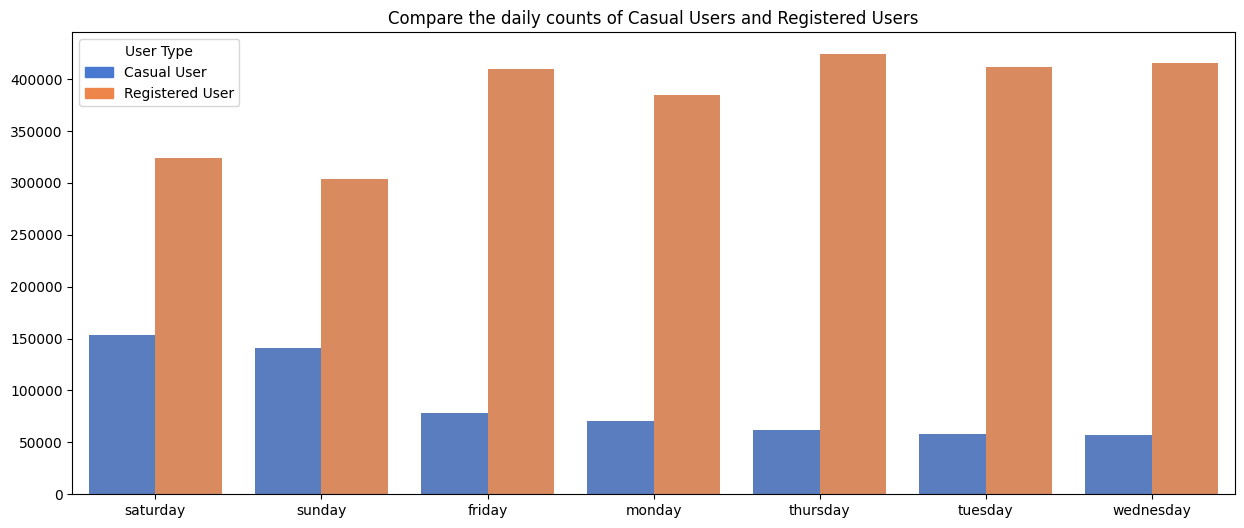

In [ ]:
# Setting the figure size for the plot to 15x6 inches
plt.figure(figsize=(15, 6))

# Creating a bar plot to compare the number of casual users and registered users by day
sns.barplot(x="day", y="user_count", hue="user_type", data=daily_user_type, palette="muted")

# Removing the labels for the y and x axes
plt.ylabel(None)
plt.xlabel(None)

# Displaying the comparison of daily counts between Casual Users and Registered Users
plt.title("Compare the daily counts of Casual Users and Registered Users")
casual_patch = mpatches.Patch(color=sns.color_palette("muted")[0], label='Casual User')
registered_patch = mpatches.Patch(color=sns.color_palette("muted")[1], label='Registered User')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")
plt.show()

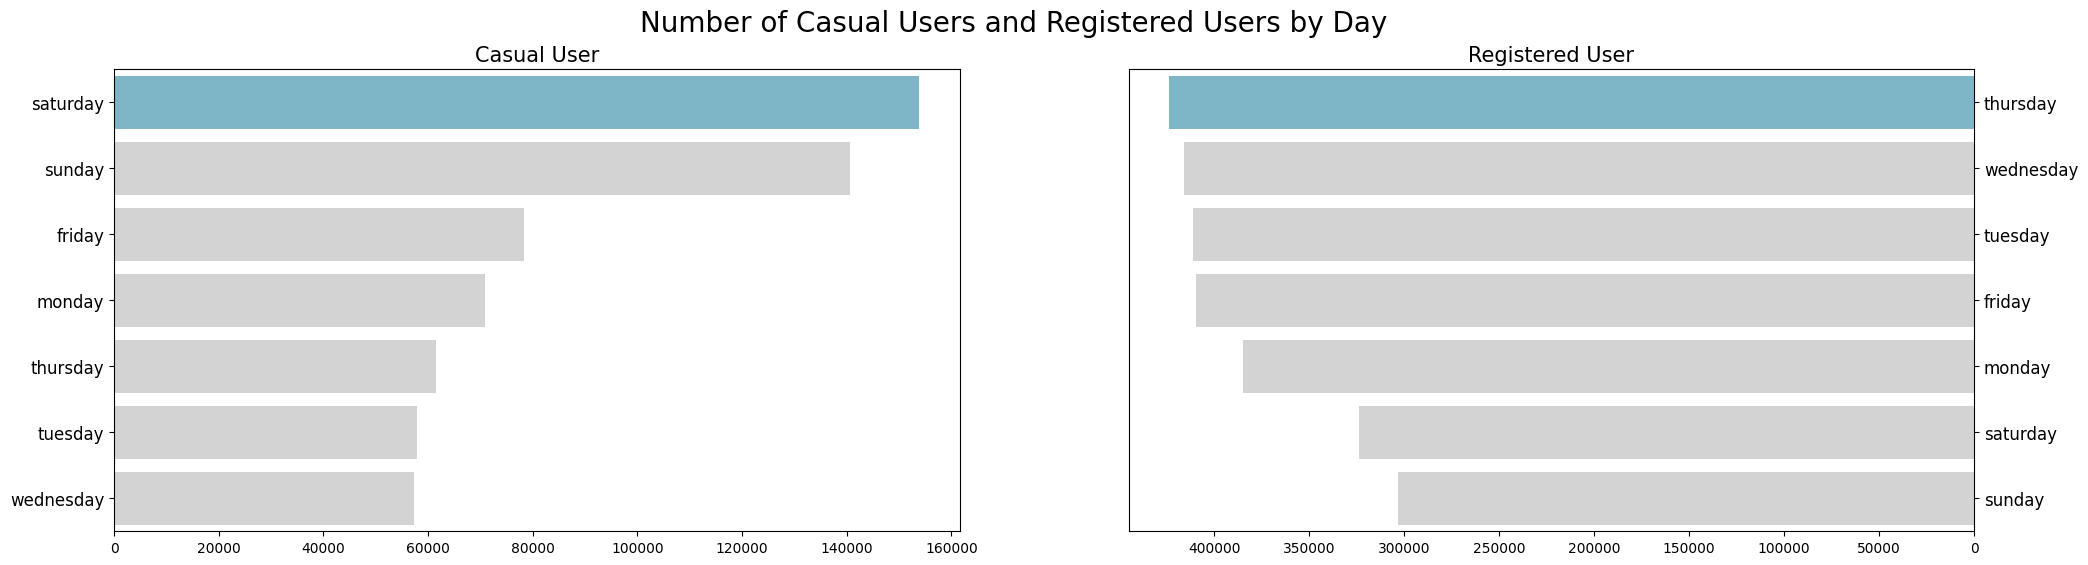

In [ ]:
# Creating subplots with 1 row and 2 columns, and setting the figure size
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Defining a color palette for the bar plots
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plotting the bar plot for Casual Users on the first subplot
sns.barplot(x="casual_user", y="day", data=sum_casual_user, palette=colors, hue="day", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# Plotting the bar plot for Registered Users on the second subplot
sns.barplot(x="registered_user", y="day", data=sum_registered_user, hue="day", legend=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Adding a super title for the entire figure
plt.suptitle("Number of Casual Users and Registered Users by Day", fontsize=20)
plt.show()

### Question 2: How productive is Bike Sharing within a 24-hour period?

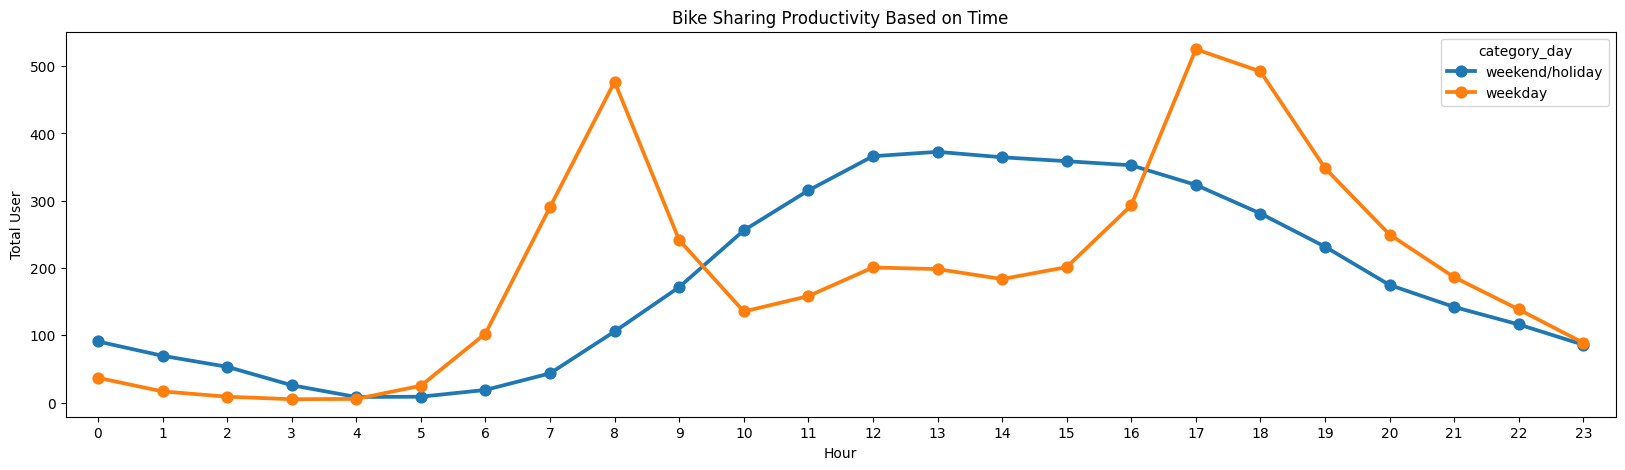

In [ ]:
# Creating a subplot with a specific figure size
fig, ax = plt.subplots(figsize=(20,5))

# Plotting a point plot to visualize Bike Sharing productivity based on time and category_day
sns.pointplot(data=hour, x='hour', y='total_user', hue='category_day', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity Based on Time')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()


During weekends or holidays, the number of users begins to rise at 6:00 AM and continues to grow until it peaks at 1:00 PM. After 4:00 PM, the user count starts to decrease until it reaches its lowest point at 5:00 AM.

On weekdays, there is a notable increase in users during the commuting hours, specifically from 6:00 to 8:00 AM and 3:00 to 5:00 PM. A significant drop in user numbers occurs at 9:00 AM when people are already engaged in their office work, and in the evening, starting at 7:00 PM. The number of users tends to remain low from midnight until 5:00 AM

### Question 3: How productive is Bike Sharing on a monthly basis?

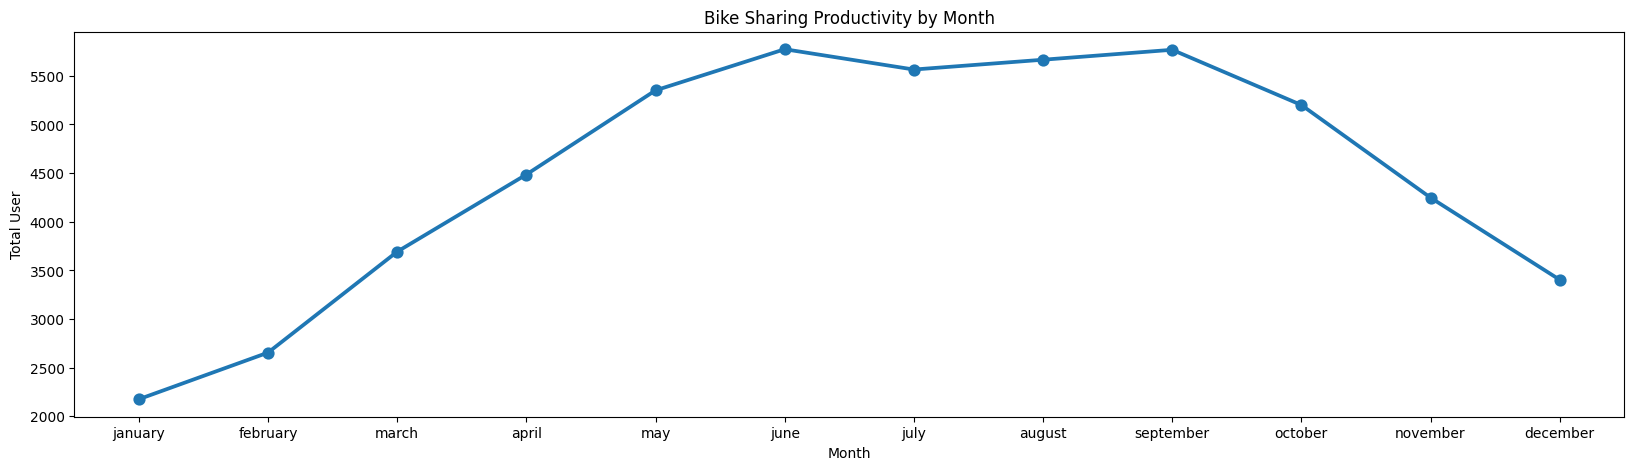

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

# Plotting a point plot to visualize bike sharing productivity by month
sns.pointplot(data=day, x='month', y='total_user', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity by Month')
ax.set_ylabel('Total User')
ax.set_xlabel('Month')
plt.show()

Bike Sharing shows peak productivity in June and September, with a significant number of users renting bicycles during these months. However, from October onwards, the user count steadily decreased, reaching its lowest point in January. The number of users began to rise again starting in February.

### Question 4: How do weather conditions and seasons influence the productivity of Bike Sharing?


In [ ]:
# Grouping the data by weather and summing the total users for each weather condition, then sorting the values in descending order
byweather = hour.groupby("weather").total_user.sum().sort_values(ascending=False).reset_index()
byweather

,weather,total_user
0,clear,2338173
1,mist,795952
2,light snow,158331
3,heavy rain,223


In [ ]:
# Grouping the data by season and summing the total users for each season, then sorting the values in descending order
byseason = hour.groupby("season").total_user.sum().sort_values(ascending=False).reset_index()
byseason

,season,total_user
0,fall,1061129
1,summer,918589
2,winter,841613
3,springer,471348


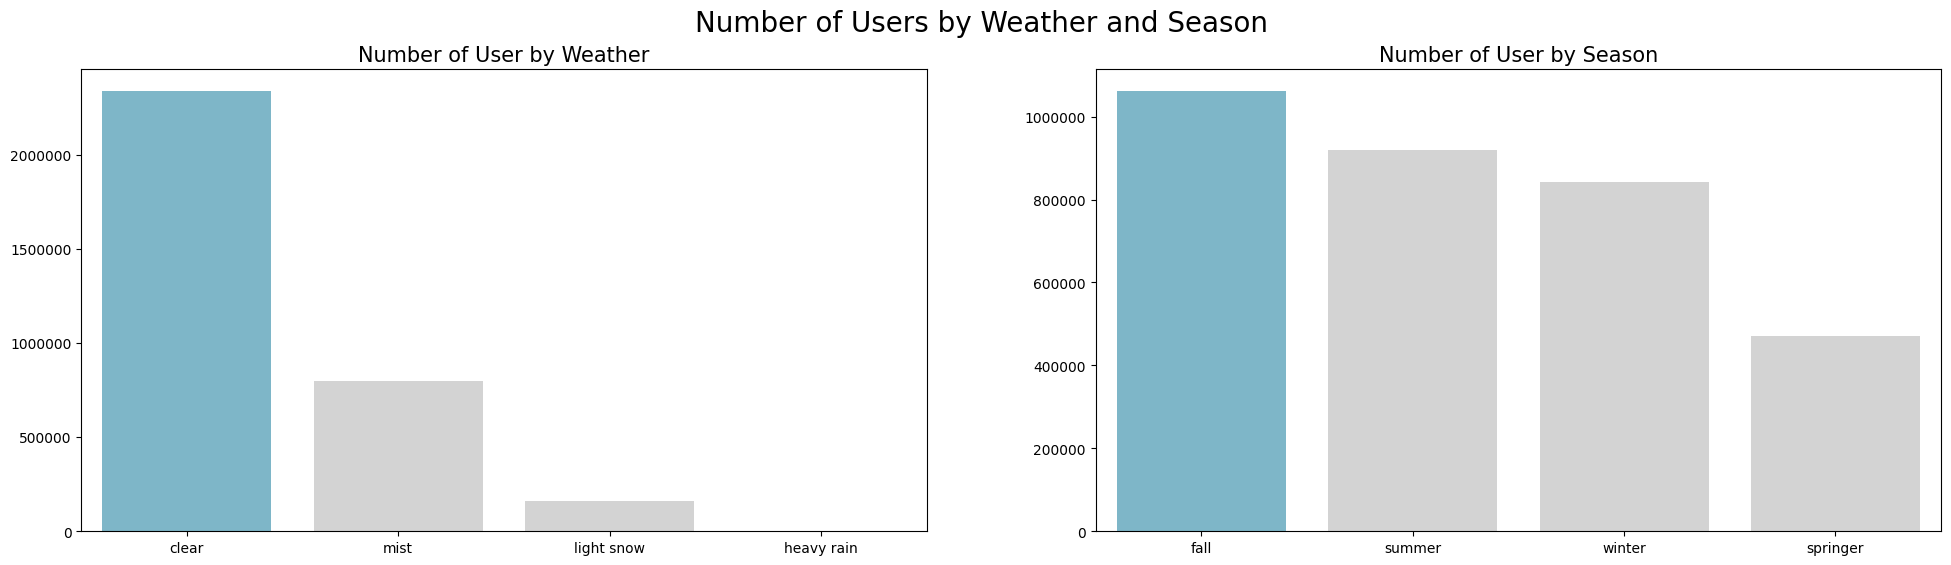

In [ ]:
# Creating subplots with 1 row and 2 columns, and setting the figure size
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Defining a color palette for the bar plots
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plotting the bar plot for the number of users by weather on the first subplot
sns.barplot(y="total_user", x="weather", data=byweather.sort_values(by="total_user", ascending=False), palette=colors, hue="weather", legend=False, ax=ax[0])
ax[0].set_title("Number of User by Weather", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].ticklabel_format(style='plain', axis='y')

# Plotting the bar plot for the number of users by season on the second subplot
sns.barplot(y="total_user", x="season", data=byseason.sort_values(by="total_user", ascending=False), palette=colors, hue="season", legend=False, ax=ax[1])
ax[1].set_title("Number of User by Season", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].ticklabel_format(style='plain', axis='y')

# Adding a super title for the entire figure
plt.suptitle("Number of Users by Weather and Season", fontsize=20)

plt.show()


Bike Sharing shows the highest productivity under **clear weather** conditions attracting **2,338,173 users**. In contrast, during **heavy rain** usage drastically decreases to just **223 users**.

When viewed by season, **fall** with the highest number of users totaling **1,061,129**. On the other hand, **spring** the lowest productivity with only 4**71,348 users**.

### RFM Analysis

RFM Analysis can answer the last three business questions:
5. When was the last time the customer made a transaction?
6. How often has the customer made purchases in the past few months?
7. How much money has the customer spent in the past few months?

In [ ]:
rfm_df = day.groupby(by="day", as_index=False).agg({
    "date": "max", # retrieve the date of the last order
    "instant": "nunique", # calculate the order quantity
    "total_user": "sum" # calculate the amount of revenue generated
})
rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]
rfm_df

,day,max_order_timestamp,frequency,monetary
0,friday,2012-12-28,104,487790
1,monday,2012-12-31,105,455503
2,saturday,2012-12-29,105,477807
3,sunday,2012-12-30,105,444027
4,thursday,2012-12-27,104,485395
5,tuesday,2012-12-25,104,469109
6,wednesday,2012-12-26,104,473048


In [ ]:
# calculates when the customer last made a transaction (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,day,frequency,monetary,recency
0,friday,104,487790,3
1,monday,105,455503,0
2,saturday,105,477807,2
3,sunday,105,444027,1
4,thursday,104,485395,4
5,tuesday,104,469109,6
6,wednesday,104,473048,5


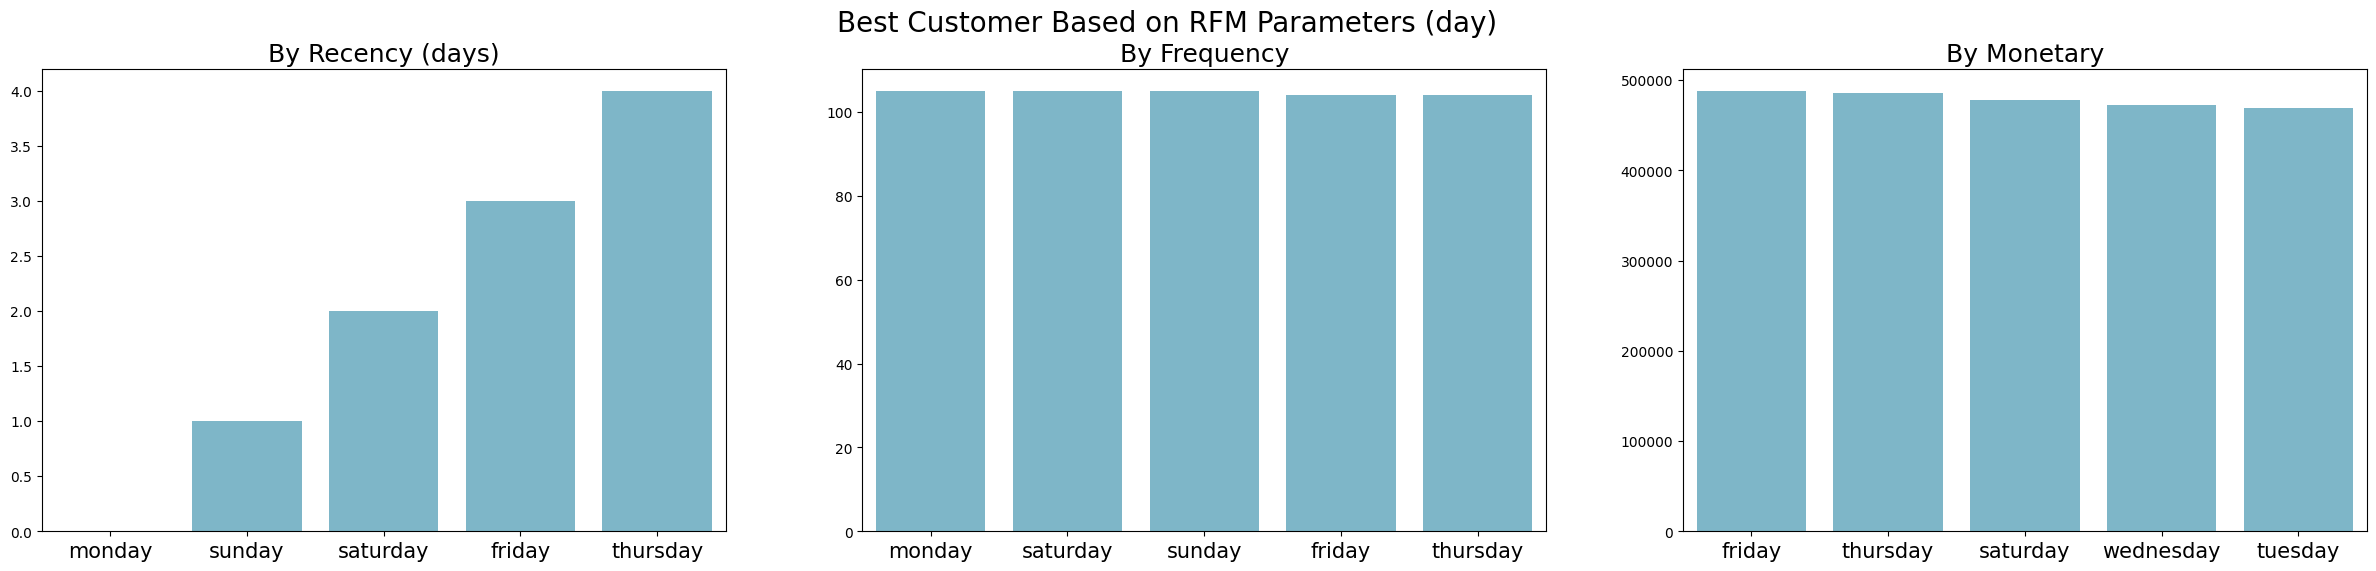

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="day", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="day", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="day", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="day", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="day", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="day", legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)
plt.show()

## Conclusion

1. What is the daily distribution of bike-sharing users based on user type?
> The daily distribution shows that casual users are highest on weekends (Saturday: 153,852 and Sunday: 140,521), while registered users dominate weekdays peaking on Thursday with 423,935 users.
2. How productive is Bike Sharing within a 24-hour period?
> Bike Sharing shows peak productivity during weekends or holidays from 6:00 AM to 1:00 PM tapering off after 4:00 PM, while on weekdays usage spikes during commuting hours (6:00–8:00 AM and 3:00–5:00 PM) and remains low from midnight to 5:00 AM.
3. How productive is Bike Sharing on a monthly basis?
> June and September are the months with the highest Bike Sharing usage, while January and February have the lowest.
4. How do weather conditions and seasons influence the productivity of Bike Sharing?
> Weather and seasons significantly influence Bike Sharing productivity, with clear weather and fall driving the highest usage, while harsh weather and spring see the lowest engagement
5. When was the last time the customer made a transaction?
> Answered in the data visualization recency section
6. How often has the customer made purchases in the past few months?
> Answered in the data visualization frequency section
7. How much money has the customer spent in the past few months?
> Answered in the data visualization monetery section

# Export Clean Dataset to csv

In [ ]:
day.to_csv(data_dir +'dashboard/day_clean.csv', index=False)

In [ ]:
hour.to_csv(data_dir +'dashboard/hour_clean.csv', index=False)